<a href="https://colab.research.google.com/github/chathasphere/chathasphere.github.io/blob/main/teaching/306_materials/003_lab11_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 11: Final Review
## April 12th, 2022

It's almost over!

Aiming to release the final exam on April 14th. You'll have a week to work on it. Same rules as the midterm exam.

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Exercise 1a.

The `billboard` data set lists Billboard top 100 hits from the year 2000. There are 76 columns that correspond to weeks that a song was in the top 100. Tidy up this data set so that it is in long format: there should a column called `week` indicating the week number and a column called `rank` specifying a song's rank in the top 100.


In [ ]:
head(billboard)

artist,track,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,⋯,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,87,82,72,77,87,94,99,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2Ge+her,The Hardest Part Of ...,2000-09-02,91,87,92,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3 Doors Down,Kryptonite,2000-04-08,81,70,68,67,66,57,54,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3 Doors Down,Loser,2000-10-21,76,76,72,69,67,65,55,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
504 Boyz,Wobble Wobble,2000-04-15,57,34,25,17,17,31,36,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
98^0,Give Me Just One Nig...,2000-08-19,51,39,34,26,26,19,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
billboard_long <- billboard %>%
  pivot_longer(cols = starts_with("wk"),
               names_to = "week",
               values_to = "rank",
               values_drop_na = TRUE
               )
billboard_long %>% head

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<chr>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk6,94


#### Subproblem: convert `week` column from character to integer type: "wk8"  should become `8` for example.

In [ ]:
billboard_long %>% mutate(week = as.integer(str_replace(week, "wk", ""))) %>% head

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<int>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,6,94


## Exercise 1b.
Which song was a top hit for the most weeks? List tracks (along with the artist) in descending order by the number of weeks they stayed in the top 100. (If you have heard of any of these songs then I'm impressed.)

In [ ]:
billboard_long %>% group_by(artist, track) %>% 
  summarize(n_weeks_hit = n()) %>% arrange(-n_weeks_hit) %>% head(10)

`summarise()` has grouped output by 'artist'. You can override using the
`.groups` argument.


artist,track,n_weeks_hit
<chr>,<chr>,<int>
Creed,Higher,57
Lonestar,Amazed,55
3 Doors Down,Kryptonite,53
"Hill, Faith",Breathe,53
Creed,With Arms Wide Open,47
Joe,I Wanna Know,44
Vertical Horizon,Everything You Want,41
matchbox twenty,Bent,39
"Braxton, Toni",He Wasn't Man Enough,37


## Exercise 1c.

Find all the artists with number one hits and count how many each had. Which artists had the most number one hits in 2000?

In [ ]:
billboard_long %>% filter(rank == 1) %>%distinct(artist, track)  %>% group_by(artist) %>% summarise(n = n())

artist,n
<chr>,<int>
Aaliyah,1
"Aguilera, Christina",2
"Carey, Mariah",1
Creed,1
Destiny's Child,2
"Iglesias, Enrique",1
Janet,1
Lonestar,1
Madonna,1


## Exercise 1d.

For each artist, create a column called `all_songs` listing the number of unique tracks they have. Using this column, find the subset of artists with at least 3 hits. Save this to a tibble called `many_hits`.

In [ ]:
# billboard_long %>% group_by(artist) %>% 
#   summarise(all_songs = (list(unique(track))))

In [ ]:
many_hits <- billboard_long %>% group_by(artist) %>% 
  summarise(all_songs = (list(unique(track)))) %>% filter(lengths(all_songs) > 2)

  # lengths applies the length function to each element in a vector...

In [ ]:
many_hits

artist,all_songs
<chr>,<list>
"Aguilera, Christina","Come On Over Baby (A..., I Turn To You , What A Girl Wants"
"Backstreet Boys, The","Shape Of My Heart , Show Me The Meaning ..., The One"
"Braxton, Toni","He Wasn't Man Enough , Just Be A Man About ..., Spanish Guitar"
Destiny's Child,"Independent Women Pa..., Jumpin' Jumpin' , Say My Name"
"Dixie Chicks, The","Cold Day In July , Cowboy Take Me Away, Goodbye Earl , Without You"
DMX,"Party Up (Up In Here..., What You Want , What's My Name"
Eminem,"Stan , The Real Slim Shady, The Way I Am"
"Houston, Whitney","Could I Have This Ki..., I Learned From The B..., My Love Is Your Love , Same Script, Differe..."
"Jackson, Alan","It Must Be Love, Pop A Top , www.memory"


## Exercise 1e.

Bonus challenge: How many unique words (space-separated) are found in all songs in this data set?

In [ ]:
billboard_long$track %>% unique() %>% str_split(" ") %>% lengths %>% sum

[1] 953

## Exercise 2a.

Write a function called `is_prime` that accepts an integer argument `num`. This function should return True when given a prime number and false otherwise.

Hint: Suppose `num` is 21. Can you use a vector to tell how many numbers smaller than 21 and larger than 1 divide 21?

In [ ]:
num <- 8

any((num %% 2:(num-1) == 0))

[1] TRUE

In [ ]:
is_prime <- function(num) {
   if (num == 2) {
      TRUE
   } else if (any(num %% 2:(num-1) == 0)) {
      FALSE
   } else { 
      TRUE
   }
}

## Exercise 2b.

For $i =1, \cdots, 30,$ create a vector where the $i$th element is "duck" if $i+1$ is prime or "goose" if $i+1$ is not prime. Do this without loops.

In [ ]:
map_lgl(2:31, is_prime)

[1]  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE
[13] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
[25] FALSE FALSE FALSE  TRUE FALSE  TRUE

In [ ]:
dg <- ifelse(map_lgl(2:31, is_prime), "duck", "goose")
dg

[1] "duck"  "duck"  "goose" "duck"  "goose" "duck"  "goose" "goose" "goose"
[10] "duck"  "goose" "duck"  "goose" "goose" "goose" "duck"  "goose" "duck" 
[19] "goose" "goose" "goose" "duck"  "goose" "goose" "goose" "goose" "goose"
[28] "duck"  "goose" "duck"

## 2c. 
How would you print the above vector so that each element appears on a new line?

In [ ]:
cat(str_c(dg, collapse = "\n"))

duck
duck
goose
duck
goose
duck
goose
goose
goose
duck
goose
duck
goose
goose
goose
duck
goose
duck
goose
goose
goose
duck
goose
goose
goose
goose
goose
duck
goose
duck

## 3a. 
Using a `map` function, find the mean of all numeric columns in the `msleep` data set. Round to two decimal places.

Also using a `map` function, find the number of unique values in each column of `msleep.`

In [ ]:
msleep %>% select(where(is.numeric)) %>% map_df(mean, na.rm=TRUE) %>% round(2)

# msleep %>% select(where(is.numeric)) %>% map_dbl(mean, na.rm=TRUE) %>% round(2)

sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.43,1.88,0.44,13.57,0.28,166.14


In [ ]:
map_df(msleep, ~length(unique(.))) # number of unique in each column

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
83,77,5,19,7,65,33,23,65,54,82


## 3b.

Return the rows corresponding to the animals with the smallest `sleep_total` in their order.

In [ ]:
msleep %>% group_by(order) %>% summarise(m = min(sleep_total))


order,m
<chr>,<dbl>
Afrosoricida,15.6
Artiodactyla,1.9
Carnivora,3.5
Cetacea,2.7
Chiroptera,19.7
Cingulata,17.4
Didelphimorphia,18.0
Diprotodontia,11.1
Erinaceomorpha,10.1


In [ ]:
msleep %>% group_by(order) %>% filter(sleep_total == min(sleep_total))

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.60,NA,3.850
Vesper mouse,Calomys,NA,Rodentia,NA,7.0,NA,NA,17.00,NA,0.045
Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.3833333,6.60,0.0108,3.500
Tree hyrax,Dendrohyrax,herbi,Hyracoidea,lc,5.3,0.5,NA,18.70,0.0123,2.950
North American Opossum,Didelphis,omni,Didelphimorphia,lc,18.0,4.9,0.3333333,6.00,0.0063,1.700
Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.1166667,4.30,0.0003,0.023
Horse,Equus,herbi,Perissodactyla,domesticated,2.9,0.6,1.0000000,21.10,0.6550,521.000
European hedgehog,Erinaceus,omni,Erinaceomorpha,lc,10.1,3.5,0.2833333,13.90,0.0035,0.770
Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NA,22.10,NA,899.995


## 3c.
Select only rows corresponding to animals whose names are made up of exactly two words (separated by a space).

In [ ]:
"^(\\w*)\\s(\\w*)$"


# ^(\\w+) -> string begins with one or more characters a-z
# \\s -> corresponds to whitespace in Regex
# (\\w+)$ -> string ends with one or more characters a-z

In [ ]:
msleep %>% filter(str_detect(name, "^(\\w+)\\s(\\w+)$"))

# modify this to include animals such as "three-toed sloth"

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.00,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.60,NA,1.350
Vesper mouse,Calomys,NA,Rodentia,NA,7.0,NA,NA,17.00,NA,0.045
Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NA,NA,21.00,0.09820,14.800
Guinea pig,Cavis,herbi,Rodentia,domesticated,9.4,0.8,0.2166667,14.60,0.00550,0.728
Tree hyrax,Dendrohyrax,herbi,Hyracoidea,lc,5.3,0.5,NA,18.70,0.01230,2.950
Asian elephant,Elephas,herbi,Proboscidea,en,3.9,NA,NA,20.10,4.60300,2547.000
European hedgehog,Erinaceus,omni,Erinaceomorpha,lc,10.1,3.5,0.2833333,13.90,0.00350,0.770
Patas monkey,Erythrocebus,omni,Primates,lc,10.9,1.1,NA,13.10,0.11500,10.000


## 3d.

For each order, find the animal with the longest name.

In [ ]:
msleep %>% group_by(order) %>% summarise(names = list(name))

order,names
<chr>,<list>
Afrosoricida,Tenrec
Artiodactyla,"Cow , Roe deer, Goat , Giraffe , Sheep , Pig"
Carnivora,"Cheetah , Northern fur seal, Dog , Domestic cat , Gray seal , Tiger , Jaguar , Lion , Caspian seal , Genet , Arctic fox , Red fox"
Cetacea,"Pilot whale , Common porpoise , Bottle-nosed dolphin"
Chiroptera,"Big brown bat , Little brown bat"
Cingulata,"Long-nosed armadillo, Giant armadillo"
Didelphimorphia,"North American Opossum, Thick-tailed opposum"
Diprotodontia,"Phalanger, Potoroo"
Erinaceomorpha,"European hedgehog, Desert hedgehog"


In [ ]:
x <- msleep %>% group_by(order) %>% summarise(names = list(name))
# $longest_name <- x$names %>% map_chr(~.[which.max(nchar(.))])

In [ ]:
x$names %>% map_chr(~.[which.max(nchar(.))])

[1] "Tenrec"                         "Roe deer"                      
 [3] "Northern fur seal"              "Bottle-nosed dolphin"          
 [5] "Little brown bat"               "Long-nosed armadillo"          
 [7] "North American Opossum"         "Phalanger"                     
 [9] "European hedgehog"              "Tree hyrax"                    
[11] "Rabbit"                         "Short-nosed echidna"           
[13] "Brazilian tapir"                "Three-toed sloth"              
[15] "Squirrel monkey"                "African elephant"              
[17] "Thirteen-lined ground squirrel" "Tree shrew"                    
[19] "Greater short-tailed shrew"

In [ ]:
head(msleep)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


## 3e.

Create a scatterplot with `brainwt` on the x-axis and `sleep_total` on the y-axis. Use a log-10 transformation for the x-axis. Color points by `vore`. Plot a *single* linear line of best fit on top of the scatterplot. 

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 27 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 27 rows containing missing values (geom_point).”


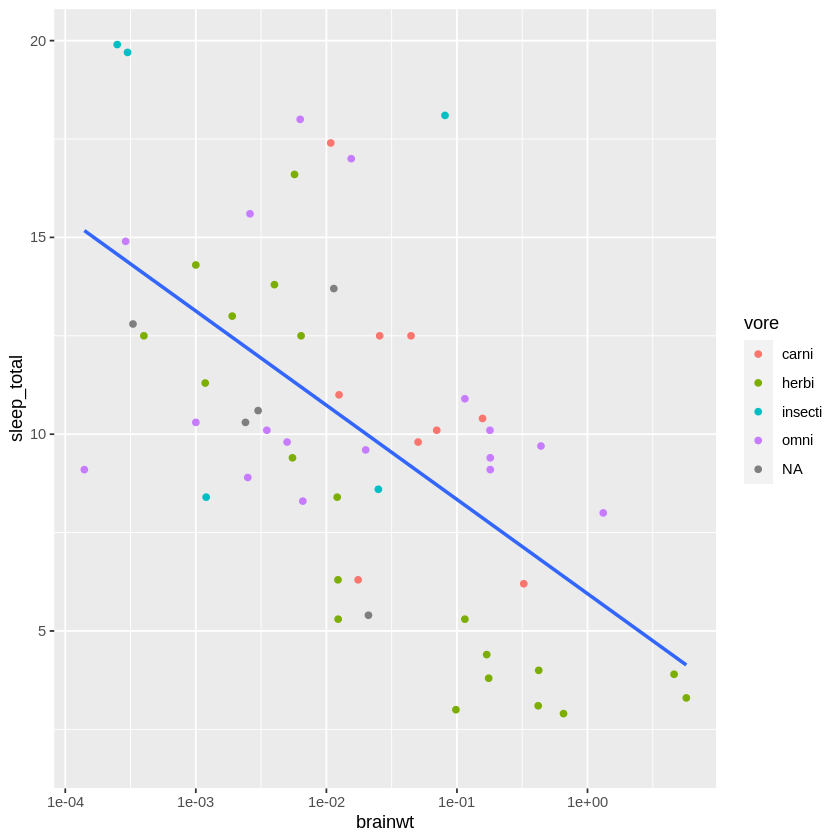

In [ ]:
ggplot(msleep, aes(x = brainwt, y = sleep_total)) +
  scale_x_continuous(trans="log10") + geom_point(aes(color=vore)) +
  geom_smooth(method="lm", se=FALSE)